In [1]:
import pandas as pd

In [2]:
datos=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
datos

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
datos=datos.replace({'Gender':{'Female':0,'Male':1}})

In [5]:
datos.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [6]:
datos.drop(columns=['User ID'],inplace=True)

In [8]:
datos

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [9]:
datos.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


In [10]:
import matplotlib.pyplot as plt

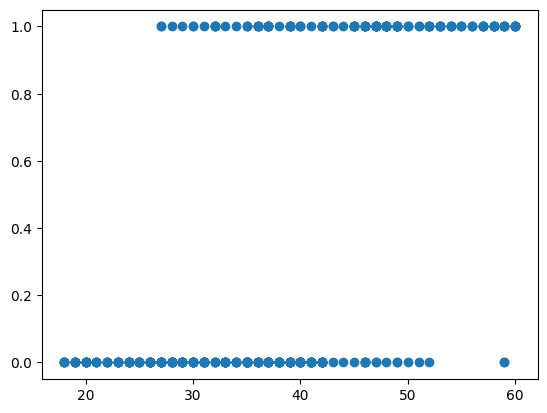

In [12]:
plt.scatter(datos['Age'],datos['Purchased'])

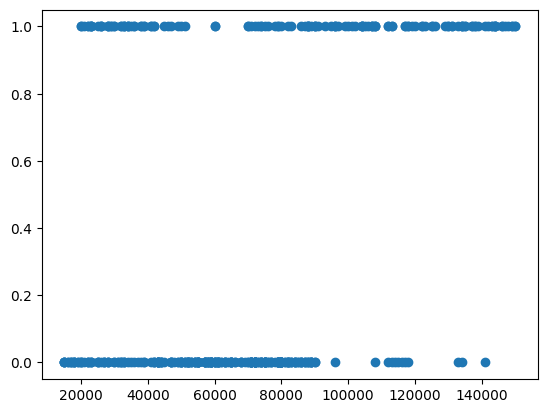

In [13]:
plt.scatter(datos['EstimatedSalary'],datos['Purchased'])

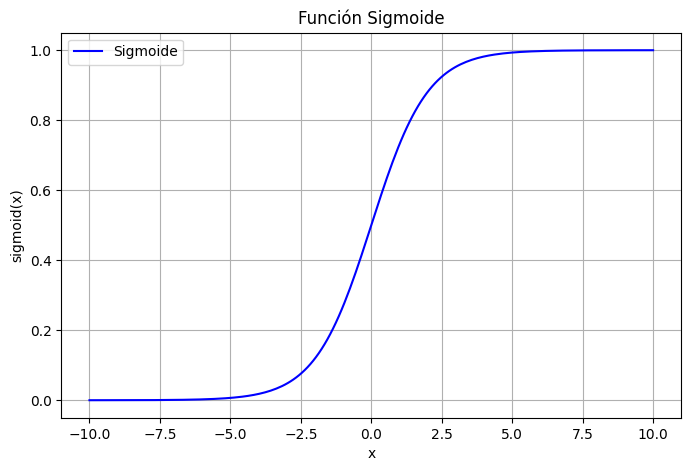

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Crear un rango de valores para x
x = np.linspace(-10, 10, 200)
y = sigmoid(x)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Sigmoide', color='blue')
plt.title("Función Sigmoide")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.legend()
plt.show()

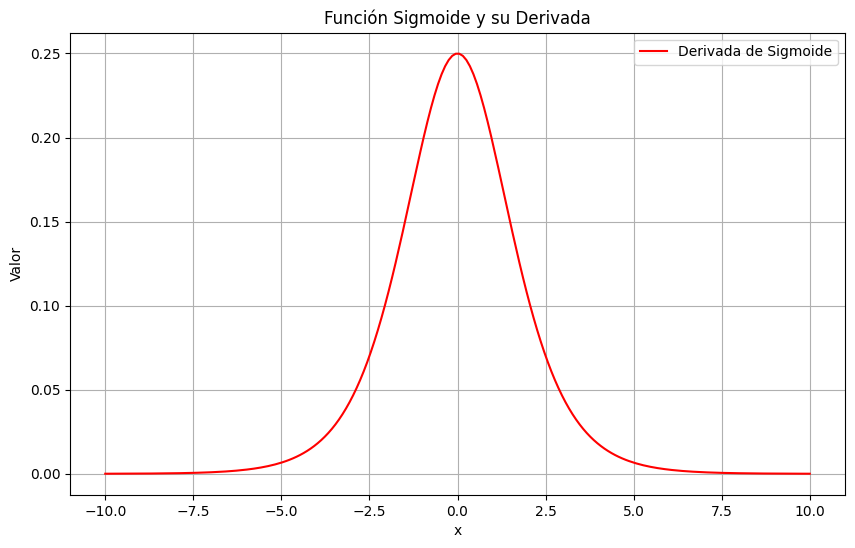

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Rango de valores para x
x = np.linspace(-10, 10, 200)
y = sigmoid(x)
y_deriv = sigmoid_derivative(x)

# Graficar ambas funciones
plt.figure(figsize=(10, 6))
#plt.plot(x, y, label='Sigmoide', color='blue')
plt.plot(x, y_deriv, label='Derivada de Sigmoide', color='red')
plt.title("Función Sigmoide y su Derivada")
plt.xlabel("x")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
X= datos[["Gender",	"Age",	"EstimatedSalary"]]
y=datos[["Purchased"]]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
#se realiza la predicción
y_pred=clf.predict(X_test)

In [30]:
clf.score(X_test, y_test)

0.8409090909090909

In [34]:
valor=clf.predict([[0,25,100]])
print(valor)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.metrics import confusion_matrix
mx=confusion_matrix(y_test,y_pred)
mx

array([[78,  2],
       [19, 33]])

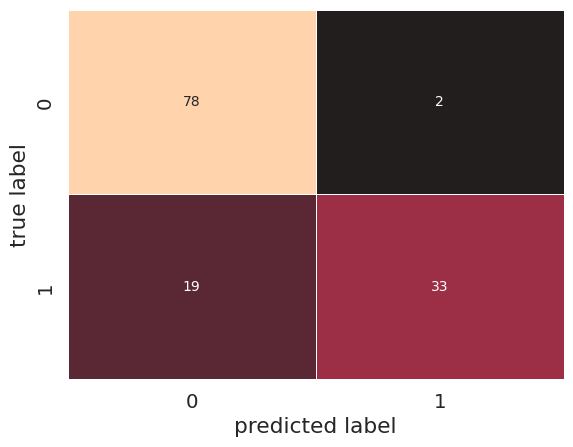

In [37]:
#Graficamos la matriz de confusión
#para graficar datos
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(font_scale=1.3) # for label size
#mx=datos(matrix de confusión)
#annot=True si se escribe del dato en cada celda
#annot_kws= datos en cada celda y tamaño de la fuente
#fmt= formato del tipo de dato (f(float),g(general),d(decimal))
#cbar barras a la derecha de la matriz
#center tiene que ver con el color (100)
sn.heatmap(mx, annot=True, annot_kws={"size": 10},fmt='g',center=0,linewidths=0.5,cbar=False) # font size
plt.ylabel('true label')
plt.xlabel('predicted label');

plt.show()

In [38]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        80
           1       0.94      0.63      0.76        52

    accuracy                           0.84       132
   macro avg       0.87      0.80      0.82       132
weighted avg       0.86      0.84      0.83       132



In [43]:
#se utiliza la Curva ROC
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

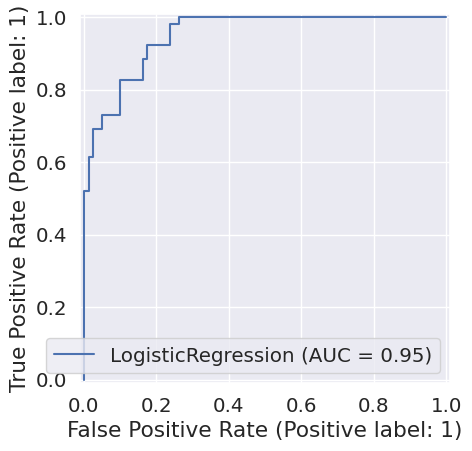

In [44]:
#displayRoc=RocCurveDisplay.from_estimator(model, X_test, y_test)
displayRoc=RocCurveDisplay.from_estimator(clf, X_test, y_test)

plt.show